<a href="https://colab.research.google.com/github/Jaro1977/Analiza-obrazu-kurs/blob/main/01_omr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
import imutils
from imutils import contours
import numpy as np
import cv2

cv2.__version__

'4.7.0'

Klucz odpowiedzi

In [2]:
ANSWER_KEY = {0:1, 1:3, 2:0, 3:2, 4:1, 5:3, 6:4, 7:1, 8:3, 9:0}

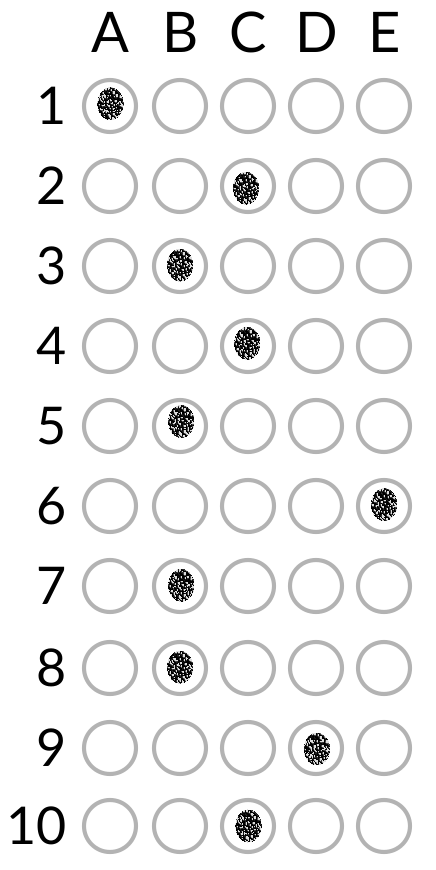

In [3]:
image = cv2.imread('answers_2.png')
cv2_imshow(image)

konwersja do skali szarości

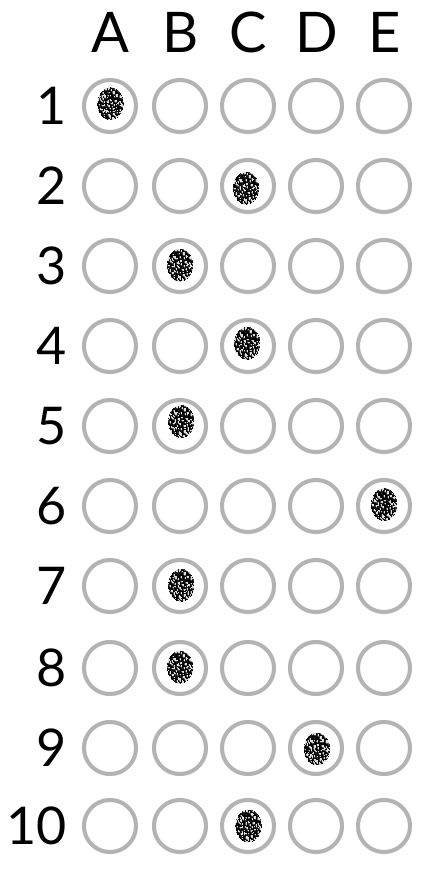

In [4]:
gray = cv2.cvtColor(src = image, code = cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

rozmycie

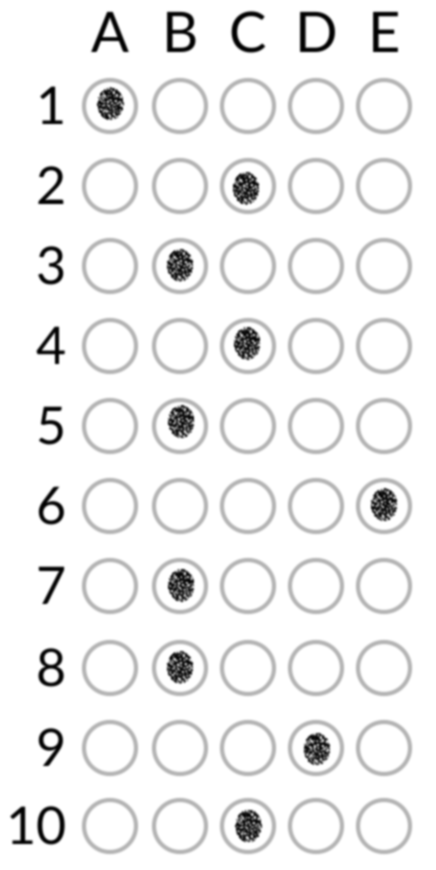

In [5]:
blurred = cv2.GaussianBlur(src = gray, ksize = (5,5), sigmaX=0)
cv2_imshow(blurred)

detekcja krawędzi

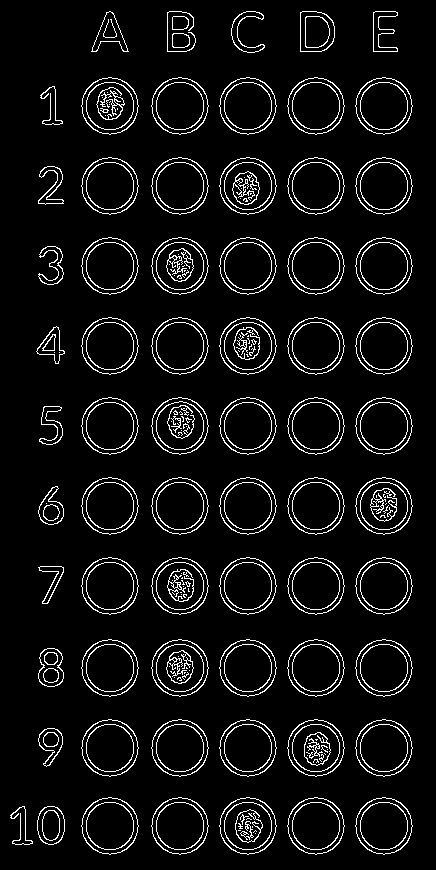

In [6]:
thresh = cv2.Canny(image = blurred, threshold1 = 70, threshold2 = 70)
cv2_imshow(thresh)

ekstrakca konturów

In [7]:
cnts = cv2.findContours(image = thresh.copy(), mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
len(cnts)

68

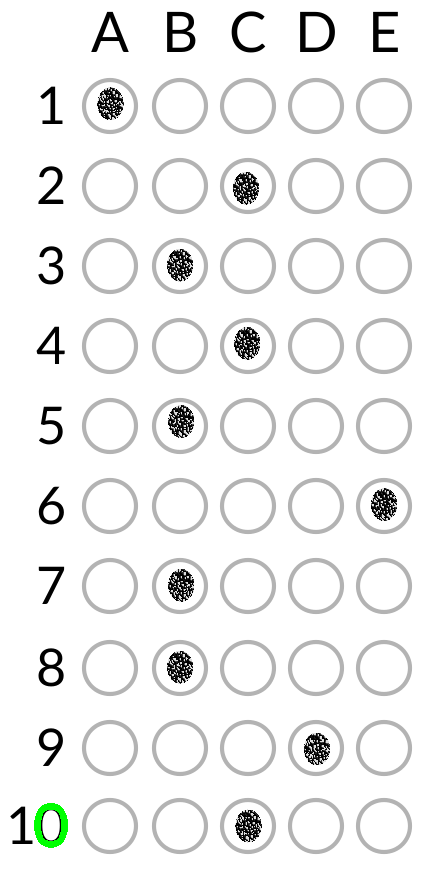

In [9]:
cnt1 = cv2.drawContours(image = image.copy(), contours = [cnts[0]], contourIdx = -1, color = (0,255,0), thickness = 5)
cv2_imshow(cnt1)

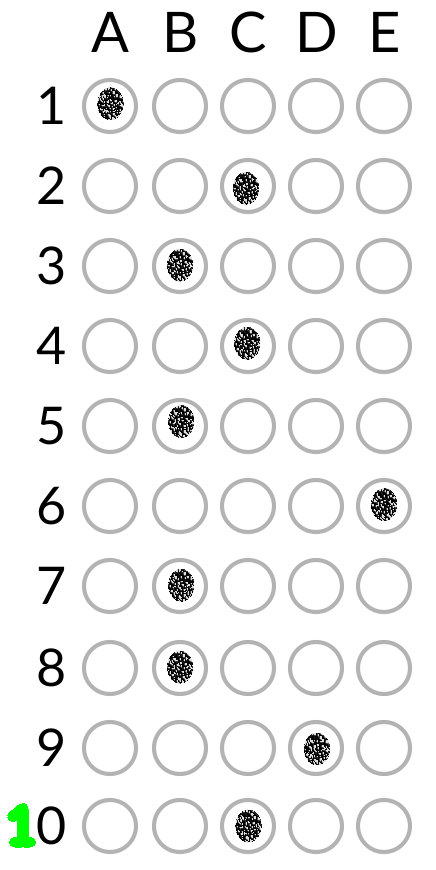

In [10]:
cnt1 = cv2.drawContours(image = image.copy(), contours = [cnts[1]], contourIdx = -1, color = (0,255,0), thickness = 5)
cv2_imshow(cnt1)

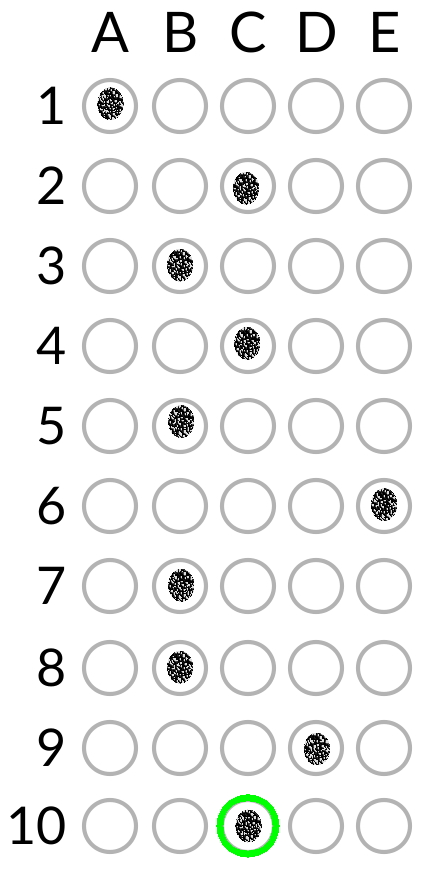

In [13]:
cnt1 = cv2.drawContours(image = image.copy(), contours = [cnts[4]], contourIdx = -1, color = (0,255,0), thickness = 5)
cv2_imshow(cnt1)

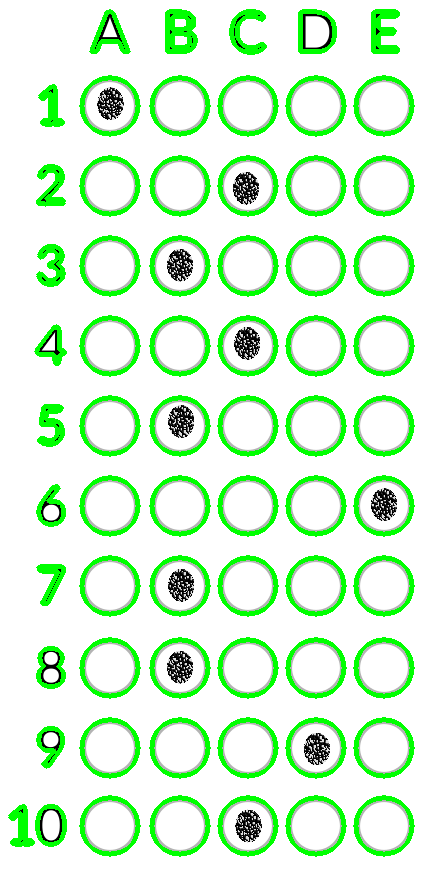

In [16]:
cnt_img = image.copy()
for contour in cnts:
  cv2.drawContours(cnt_img, [contour], contourIdx = -1, color = (0,255,0), thickness =3)
cv2_imshow(cnt_img)

wydobycie odpowiednich konturów

Liczba pól z odpowiedziami: 50


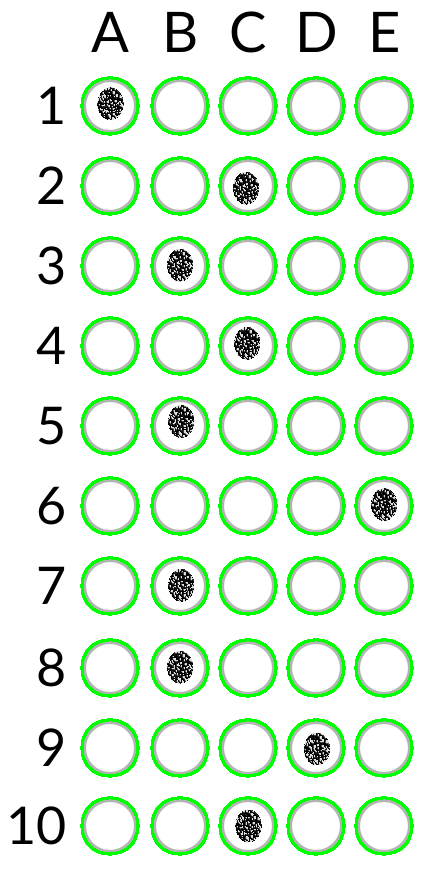

In [18]:
question_contours = []
for contour in cnts:
  (x,y,w,h) = cv2.boundingRect(contour)
  ar = w/ float(h)

  if w >= 50 and h >= 50 and ar >0.9 and ar <1.1:
    question_contours.append(contour)

print(f'Liczba pól z odpowiedziami: {len(question_contours)}')

cnt_img = image.copy()
for contour in question_contours:
  cv2.drawContours(cnt_img, [contour], contourIdx = -1, color = (0,255,0), thickness = 2)
cv2_imshow(cnt_img)



rozwiązanie dla jednego pytania

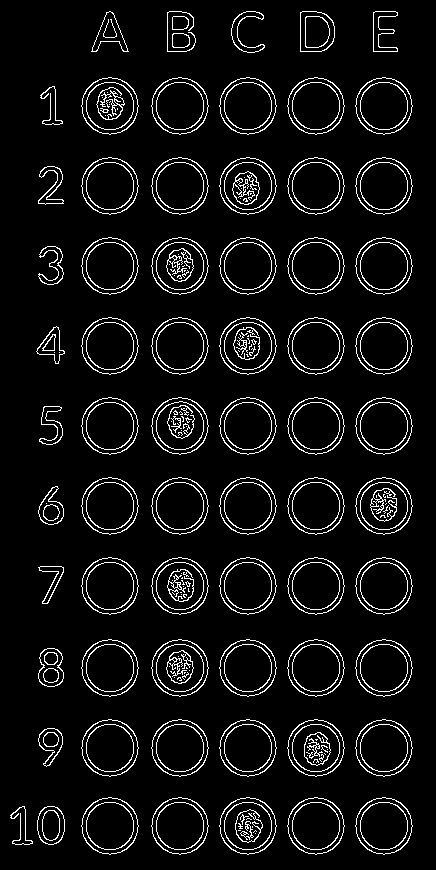

In [19]:
cv2_imshow(thresh)

In [40]:
#sortowanie kontur od góry do dołu
question_top_bottom = imutils.contours.sort_contours(question_contours, method = 'top-to-bottom')[0]

#wydobycie pierwszych 5 kontur
first_5 = question_top_bottom[:5]
first_5_left_right = imutils.contours.sort_contours(first_5, method = 'left-to-right')

img = image.copy()
marked = None

for idx, contour in enumerate(first_5_left_right):
  print(f'idx: {idx}')
  #tworzy maskę z samych zer
  mask = np.zeros(thresh.shape, dtype='uint8')

  #rysujemy kontur na masce
  cv2.drawContours(mask, [contour], -1, 255, -1)

  #przeprowadzamy operacje bitwise_and na obrazie thresh
  mask = cv2.bitwise_and(thresh, thresh, mask = mask)
  cv2_imshow(mask)

  #zliczamy liczbę pikseli niezerowych
  total = cv2.countNonZero(mask)

  if marked in None or total >marked[0]:
    marked = (total, idx)
  print(marked)

  #kolor czerwony
  color = (0,0,255)

  key = ANSWER_KEY[0]
  print(key)

  if key == marked[1]:
    #zaznacz zielony
    color = (0,255,0)

cv2.drawContours(img, [first_5_left_right[key], -1, color, 2])
cv2_imshow(img)
  

idx: 0


error: ignored